In [1]:
import numpy as np
import pandas as pd
from tensorflow import random

X = pd.read_csv('../data/aps_failure_training_feats.csv')
y = pd.read_csv('../data/aps_failure_training_target.csv')

In [2]:
from sklearn.model_selection import train_test_split
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X_test.columns)

X_test = sc.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X_train.columns)

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

random.set_seed(seed)
np.random.seed(seed)

model = Sequential()
model.add(Dense(4, activation='relu', kernel_initializer='uniform', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
model.fit(X_train, y_train, epochs=100, batch_size=20, verbose=1, validation_split=0.2, shuffle=False)

Epoch 1/100
1920/1920 [==============================] - 4s 2ms/step - loss: 0.1087 - accuracy: 0.9833 - val_loss: 0.0465 - val_accuracy: 0.9842
Epoch 2/100
1920/1920 [==============================] - 3s 2ms/step - loss: 0.0640 - accuracy: 0.9834 - val_loss: 0.0442 - val_accuracy: 0.9842
Epoch 3/100
1920/1920 [==============================] - 4s 2ms/step - loss: 0.0610 - accuracy: 0.9834 - val_loss: 0.0433 - val_accuracy: 0.9842
Epoch 4/100
1920/1920 [==============================] - 5s 3ms/step - loss: 0.0600 - accuracy: 0.9834 - val_loss: 0.0437 - val_accuracy: 0.9842
Epoch 5/100
1920/1920 [==============================] - 3s 2ms/step - loss: 0.0603 - accuracy: 0.9834 - val_loss: 0.0444 - val_accuracy: 0.9842
Epoch 6/100
1920/1920 [==============================] - 4s 2ms/step - loss: 0.0568 - accuracy: 0.9834 - val_loss: 0.0473 - val_accuracy: 0.9842
Epoch 7/100
1920/1920 [==============================] - 3s 2ms/step - loss: 0.0594 - accuracy: 0.9834 - val_loss: 0.0447 - val_ac

1920/1920 [==============================] - 4s 2ms/step - loss: 0.0535 - accuracy: 0.9834 - val_loss: 0.0573 - val_accuracy: 0.9842
Epoch 58/100
1920/1920 [==============================] - 3s 2ms/step - loss: 0.0532 - accuracy: 0.9834 - val_loss: 0.0478 - val_accuracy: 0.9842
Epoch 59/100
1920/1920 [==============================] - 4s 2ms/step - loss: 0.0542 - accuracy: 0.9834 - val_loss: 0.0581 - val_accuracy: 0.9842
Epoch 60/100
1920/1920 [==============================] - 3s 2ms/step - loss: 0.0531 - accuracy: 0.9834 - val_loss: 0.0549 - val_accuracy: 0.9842
Epoch 61/100
1920/1920 [==============================] - 4s 2ms/step - loss: 0.0542 - accuracy: 0.9834 - val_loss: 0.0558 - val_accuracy: 0.9842
Epoch 62/100
1920/1920 [==============================] - 3s 2ms/step - loss: 0.0525 - accuracy: 0.9834 - val_loss: 0.0547 - val_accuracy: 0.9842
Epoch 63/100
1920/1920 [==============================] - 4s 2ms/step - loss: 0.0540 - accuracy: 0.9834 - val_loss: 0.0472 - val_accuracy

In [6]:
y_pred = model.predict(X_test)

375/375 [==============================] - 1s 1ms/step


Calculating ROC Curve

In [7]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

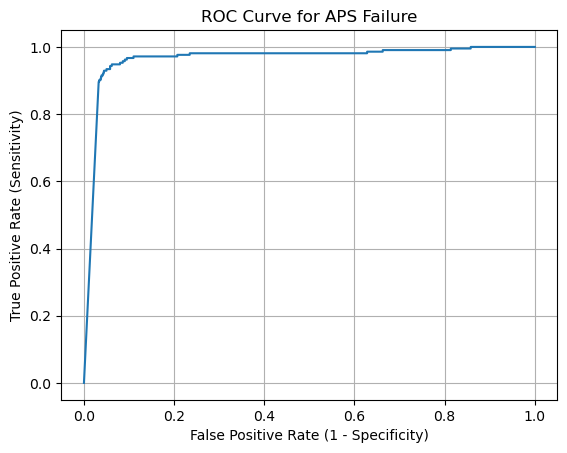

In [9]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.title('ROC Curve for APS Failure')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [11]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9647514901626855